In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

/Users/Monica/.virtualenvs/dataanalysis/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/Monica/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [2]:
# Note to self for later: http://stackoverflow.com/a/17001474

In [3]:
# Data from https://www.census.gov/econ/currentdata/datasets/
data_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='data')
data_df.head()

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val
0,1,1,5,0,1,0,17200.0
1,1,1,2,0,1,0,9.0
2,1,1,3,0,1,0,11.0
3,1,1,4,0,1,0,22.0
4,1,1,1,0,1,0,42.0


In [4]:
categories_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='categories')
data_types_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='data_types')
error_types_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='error_types')
geo_levels_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='geo_levels')
periods_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='periods')

In [5]:
categories_df.head(2)

,cat_idx,cat_code,cat_desc,cat_indent
0,1,SOLD,New Single-family Houses Sold,0
1,2,ASOLD,Annual Rate for New Single-family Houses Sold,0


In [6]:
# it auto-merges cat_idx in our original dataframe with cat_idx in categories_df
# it auto-merges dt_idx in our original dataframe with dt_idx in data_types_df
# it auto-merges geo_idx in our original dataframe with geo_idx in geo_levels_df
# it auto-merges per_idx in our original dataframe with per_idx in periods_df
df = data_df.merge(categories_df).merge(data_types_df).merge(geo_levels_df).merge(periods_df)
# We only want to look at the total number of homes sold across entire the united states
df = df[(df['cat_code'] == 'SOLD') & (df['geo_code'] == 'US') & (df['dt_code'] == 'TOTAL')]

In [7]:
# We don't merge error_types_df because all of the errors are the same
df['et_idx'].value_counts()

0    641
Name: et_idx, dtype: int64

In [8]:
df.head(2)

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
4,1,1,1,0,1,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
14,2,1,1,0,1,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01


In [9]:
# Now let's remove the join columns to keep things clean
df = df.drop(['per_idx', 'cat_idx', 'dt_idx', 'et_idx', 'geo_idx'], axis=1)
df.head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
4,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
14,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
24,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01
34,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01
44,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01


In [10]:
# At least we can see 'per_name' (period name) is already a datetime!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 4 to 15199
Data columns (total 11 columns):
is_adj        641 non-null int64
val           641 non-null float64
cat_code      641 non-null object
cat_desc      641 non-null object
cat_indent    641 non-null int64
dt_code       641 non-null object
dt_desc       641 non-null object
dt_unit       641 non-null object
geo_code      641 non-null object
geo_desc      641 non-null object
per_name      641 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 60.1+ KB


In [11]:
df.index= df['per_name']
df.head(3)

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
per_name,,,,,,,,,,,
1963-01-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
1963-02-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
1963-03-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01


In [12]:
# Select specific(-ish) dates via the index

In [13]:
mylist = ['cat', 'dog', 'frog', 'log']

In [14]:
mylist[0]

'cat'

In [17]:
#SELECT EVERYTHING IN MARCH 1970
df['1970-03']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
per_name,,,,,,,,,,,
1970-03-01,0,36.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-03-01


In [18]:
df['1987']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
per_name,,,,,,,,,,,
1987-01-01,0,53.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1987-01-01
1987-02-01,0,59.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1987-02-01
1987-03-01,0,73.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1987-03-01
1987-04-01,0,72.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1987-04-01
1987-05-01,0,62.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1987-05-01
1987-06-01,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1987-06-01
1987-07-01,0,55.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1987-07-01
1987-08-01,0,56.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1987-08-01
1987-09-01,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1987-09-01


In [19]:
df['1987']['val'].sum()

672.0

In [20]:
df['1980']['val'].sum()

545.0

# select slices of time data

In [21]:
mylist

['cat', 'dog', 'frog', 'log']

In [22]:
mylist[:2]

['cat', 'dog']

In [23]:
df['2001':]

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
per_name,,,,,,,,,,,
2001-01-01,0,72.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2001-01-01
2001-02-01,0,85.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2001-02-01
2001-03-01,0,94.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2001-03-01
2001-04-01,0,84.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2001-04-01
2001-05-01,0,80.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2001-05-01
2001-06-01,0,79.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2001-06-01
2001-07-01,0,76.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2001-07-01
2001-08-01,0,74.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2001-08-01
2001-09-01,0,66.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2001-09-01


In [24]:
# Do something(s) with our data

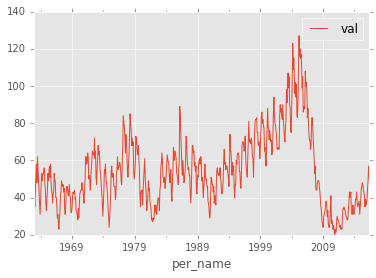

In [26]:
df.plot(y='val') #shows data for every month for every year

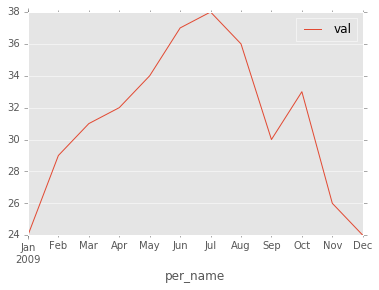

In [27]:
df['2009'].plot(y='val')

# .resample is the groupby of time-based data

.resample documentation -> http://stackoverflow.com/questions/17001389/pandas-resample-documentation

- B       business day frequency
- C       custom business day frequency (experimental)
- D       calendar day frequency
- W       weekly frequency
- M       month end frequency
- BM      business month end frequency
- CBM     custom business month end frequency
- MS      month start frequency
- BMS     business month start frequency
- CBMS    custom business month start frequency
- Q       quarter end frequency
- BQ      business quarter endfrequency
- QS      quarter start frequency
- BQS     business quarter start frequency
- A       year end frequency
- BA      business year end frequency
- AS      year start frequency
- BAS     business year start frequency
- BH      business hour frequency
- H       hourly frequency
- T       minutely frequency
- S       secondly frequency
- L       milliseonds
- U       microseconds
- N       nanoseconds

In [30]:
df.resample('A').sum()

,is_adj,val,cat_indent
per_name,,,
1963-12-31,0,560.0,0
1964-12-31,0,565.0,0
1965-12-31,0,575.0,0
1966-12-31,0,461.0,0
1967-12-31,0,488.0,0
1968-12-31,0,490.0,0
1969-12-31,0,449.0,0
1970-12-31,0,486.0,0
1971-12-31,0,657.0,0


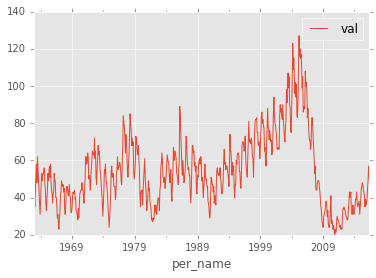

In [35]:
df.plot(y='val') # shows each month

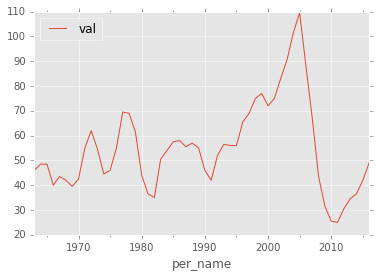

In [36]:
df.resample('A').median().plot(y='val') 
# shows the average for each year -- 
# to reduce the number of data points but still capture all of the data

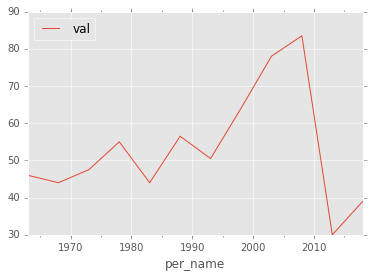

In [33]:
df.resample('5A').median().plot(y='val') #annual, but collect them into buckets of 5 years.

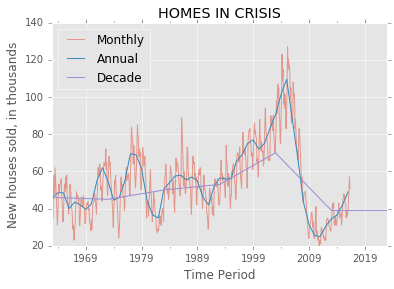

In [45]:
ax = df.plot(y='val', label = 'Monthly', alpha =0.5)
df.resample('A').median().plot(y='val', ax=ax, label='Annual')
df.resample('10a').median().plot(y='val', ax=ax, label='Decade')
ax.set_xlabel('Time Period')
ax.set_ylabel('New houses sold, in thousands')
ax.set_title("HOMES IN CRISIS")

In [40]:
df.index.name = "Period Name" #renames the per_name column to name 

In [46]:
df.resample('A').min().sort_values(by='val')

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
Period Name,,,,,,,,,,,
2010-12-31,0,20.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2010-01-01
2011-12-31,0,21.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2011-01-01
2012-12-31,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2012-01-01
1966-12-31,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1966-01-01
2009-12-31,0,24.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2009-01-01
1974-12-31,0,24.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1974-01-01
2008-12-31,0,26.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2008-01-01
1981-12-31,0,27.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1981-01-01
1969-12-31,0,28.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1969-01-01


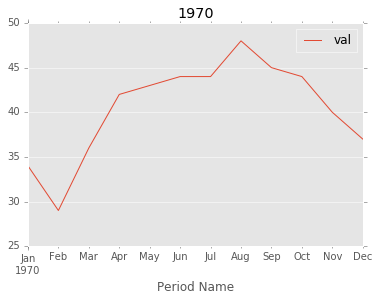

In [48]:
df['1970'].plot(y='val', title='1970')

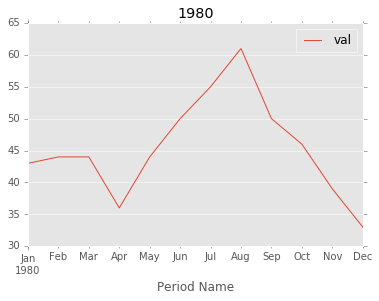

In [49]:
df['1980'].plot(y='val', title='1980')

In [50]:
import datetime

In [51]:
datetime.datetime(2016, 6, 7, 14, 30).month

6

In [52]:
df['val']/4

Period Name
1963-01-01    10.50
1963-02-01     8.75
1963-03-01    11.00
1963-04-01    13.00
1963-05-01    14.50
1963-06-01    12.00
1963-07-01    15.50
1963-08-01    14.00
1963-09-01    12.25
1963-10-01    11.00
1963-11-01     9.75
1963-12-01     7.75
1964-01-01     9.75
1964-02-01    11.50
1964-03-01    13.25
1964-04-01    12.25
1964-05-01    13.00
1964-06-01    13.25
1964-07-01    13.50
1964-08-01    14.00
1964-09-01    12.00
1964-10-01    11.25
1964-11-01     9.25
1964-12-01     8.25
1965-01-01     9.50
1965-02-01    11.00
1965-03-01    13.25
1965-04-01    12.25
1965-05-01    13.50
1965-06-01    14.25
              ...  
2013-12-01     7.75
2014-01-01     8.25
2014-02-01     8.75
2014-03-01     9.75
2014-04-01     9.75
2014-05-01    10.75
2014-06-01     9.50
2014-07-01     8.75
2014-08-01     9.00
2014-09-01     9.25
2014-10-01     9.50
2014-11-01     7.75
2014-12-01     8.75
2015-01-01     9.75
2015-02-01    11.25
2015-03-01    11.50
2015-04-01    12.00
2015-05-01    11.75
2015-06-

In [53]:
df.groupby(by=df.index.month).median()

,is_adj,val,cat_indent
1,0,44.5,0
2,0,50.0,0
3,0,58.0,0
4,0,59.5,0
5,0,58.0,0
6,0,58.0,0
7,0,55.0,0
8,0,56.0,0
9,0,50.0,0
10,0,51.0,0


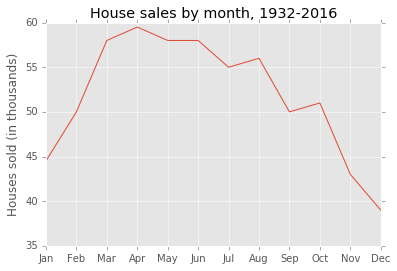

In [80]:
#let's graph is
ax = df.groupby(by=df.index.month).median().plot(y='val', legend=False)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel("Houses sold (in thousands)")
ax.set_title("House sales by month, 1932-2016")


In [66]:
#the averag January, the average July

df.groupby(by=df.index.month).median()
# the least sold in a month (e.g., the worst January ever , the worst July ever, etc)
df.groupby(by=df.index.month).min()

# the most sold in a month (e.g., the best January ever , the best July ever, etc)
df.groupby(by=df.index.month).max()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
1,0,92.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-01-01
2,0,109.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-02-01
3,0,127.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-03-01
4,0,116.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-04-01
5,0,120.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-05-01
6,0,115.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2015-06-01
7,0,117.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2015-07-01
8,0,110.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2015-08-01
9,0,99.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2015-09-01
10,0,105.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2015-10-01


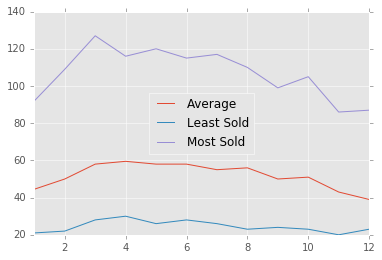

In [71]:
#the averag January, the average July

ax = df.groupby(by=df.index.month).median().plot(y='val', label='Average')
# the least sold in a month (e.g., the worst January ever , the worst July ever, etc)
df.groupby(by=df.index.month).min().plot(y='val', ax=ax, label = 'Least Sold')

# the most sold in a month (e.g., the best January ever , the best July ever, etc)
df.groupby(by=df.index.month).max().plot(y='val', ax=ax, label = 'Most Sold')

# Filling in between the lines
you use .fill_between

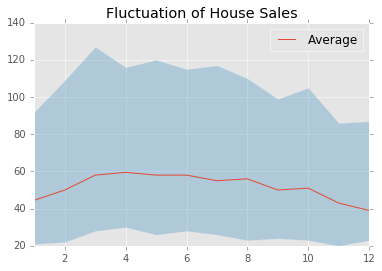

In [82]:
#make a graph of the average 
ax = df.groupby(by=df.index.month).median().plot(y='val', label='Average')
x_values = df.groupby(by=df.index.month).median().index
# get the minimum
min_values = df.groupby(by=df.index.month)['val'].min()
#get maxs
max_values = df.groupby(by=df.index.month)['val'].max()
ax.fill_between(x_values, min_values, max_values, alpha=0.3)
ax.set_title("Fluctuation of House Sales")


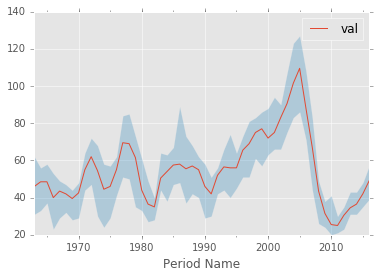

In [90]:
ax = df.resample('A').median().plot(y='val')
x_values = df.resample('A').median().index
min_values =  df.resample('A')['val'].min()
max_values =  df.resample('A')['val'].max()
ax.fill_between(x_values, min_values, max_values, alpha=0.3)

resample is groupby but for time, groupby is cyclic-- can be used to group all januarys, all februarys, etc.